In [176]:
from statistics import linear_regression

from IPython.core.pylabtools import figsize
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns


california = fetch_california_housing()

df=pd.DataFrame(data=california.data,columns=california.feature_names)
df["MedHouseVal"]=california.target
x=df.drop("MedHouseVal",axis=1)
y=df["MedHouseVal"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)


(16512, 8)


In [78]:
lr_california=LinearRegression()
lr_california.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
california_train_r2=r2_score(y_train,lr_california.predict(X_train))
california_test_r2=r2_score(y_test,lr_california.predict(X_test))
print(california_train_r2)
print(california_test_r2)



diff_train_test=california_train_r2-california_test_r2
print(diff_train_test)

if diff_train_test>0.1:
    print("overfitting probability")
else:
    print("overfitting is not possible")

coef_df=pd.DataFrame({
    "feature":x.columns,
    "Coefficient":lr_california.coef_,
})
display(coef_df)



sorted_coef=coef_df.sort_values(by='Coefficient', ascending=False)

print("the most important features are:")
display(sorted_coef)
most_important_feature=print(sorted_coef.iloc[0])

0.6125511913966952
0.5757877060324508
0.03676348536424445
overfitting is not possible


,feature,Coefficient
0,MedInc,0.854383
1,HouseAge,0.122546
2,AveRooms,-0.294410
3,AveBedrms,0.339259
4,Population,-0.002308
5,AveOccup,-0.040829
6,Latitude,-0.896929
7,Longitude,-0.869842


the most important features are:


,feature,Coefficient
0,MedInc,0.854383
3,AveBedrms,0.339259
1,HouseAge,0.122546
4,Population,-0.002308
5,AveOccup,-0.040829
2,AveRooms,-0.294410
7,Longitude,-0.869842
6,Latitude,-0.896929


feature          MedInc
Coefficient    0.854383
Name: 0, dtype: object


In [80]:
elastic_california=ElasticNet(alpha=0.1,l1_ratio=0.05,fit_intercept=True)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scale_elastic_california=StandardScaler()
scale_elastic_california_train=scale_elastic_california.fit_transform(X_train)
scale_elastic_california_test=scale_elastic_california.transform(X_test)


elastic_california=ElasticNet(alpha=0.1,l1_ratio=0.05,fit_intercept=True)
elastic_california.fit(scale_elastic_california_train,y_train)

r2_score_elastic_train=r2_score(y_train,elastic_california.predict(scale_elastic_california_train))
print("r2_score_elastic_train:",r2_score_elastic_train)
r2_score_elastic_test=r2_score(y_test,elastic_california.predict(scale_elastic_california_test))
print("r2_score_elastic_test:",r2_score_elastic_test)

diff_r2_score_elastic=r2_score_elastic_train-r2_score_elastic_test
print("diff_r2_score_elastic_trian_test :",diff_r2_score_elastic)


if diff_r2_score_elastic>0.1:
    print("overfitting probability")
else:
    print("overfitting is not possible")

coef_elastic_df=pd.DataFrame({
    "feature":x.columns,
    "Coefficient":elastic_california.coef_,
})
display(coef_elastic_df)

sorted_elastic_coef=coef_elastic_df.sort_values(by="Coefficient" ,ascending=False)
print("the most important features are:")
display(sorted_elastic_coef)

r2_score_elastic_train: 0.5710466234704792
r2_score_elastic_test: 0.5526274487088116
diff_r2_score_elastic_trian_test : 0.018419174761667545
overfitting is not possible


,feature,Coefficient
0,MedInc,0.734417
1,HouseAge,0.154314
2,AveRooms,-0.063292
3,AveBedrms,0.082247
4,Population,0.003372
5,AveOccup,-0.033934
6,Latitude,-0.392785
7,Longitude,-0.353470


the most important features are:


,feature,Coefficient
0,MedInc,0.734417
1,HouseAge,0.154314
3,AveBedrms,0.082247
4,Population,0.003372
5,AveOccup,-0.033934
2,AveRooms,-0.063292
7,Longitude,-0.353470
6,Latitude,-0.392785


In [81]:
df_comparison=pd.DataFrame({
    "feature":x.columns,
    "lr Coefficient":lr_california.coef_,
    "Elastic Net Coefficient":elastic_california.coef_,
})
display(df_comparison)

,feature,lr Coefficient,Elastic Net Coefficient
0,MedInc,0.854383,0.734417
1,HouseAge,0.122546,0.154314
2,AveRooms,-0.294410,-0.063292
3,AveBedrms,0.339259,0.082247
4,Population,-0.002308,0.003372
5,AveOccup,-0.040829,-0.033934
6,Latitude,-0.896929,-0.392785
7,Longitude,-0.869842,-0.353470


گیولاریزیشن (Regularization) یکی از روش‌های مهم در یادگیری ماشین است که برای جلوگیری از بیش‌برازش استفاده می‌شود. در بیش‌برازش مدل روی داده‌های آموزش بسیار خوب عمل می‌کند، اما روی داده‌های جدید دقت پایین‌تری دارد، چون الگوهای تصادفی و نویز را نیز یاد گرفته است. رگیولاریزیشن با اضافه کردن یک جریمه به تابع خطا باعث می‌شود که مدل از انتخاب ضرایب خیلی بزرگ اجتناب کند و ساده‌تر بماند. مدل ساده‌تر بهتر می‌تواند روی داده‌های جدید تعمیم پیدا کند و به همین دلیل رگیولاریزیشن کمک می‌کند مشکل بیش‌برازش کاهش یابد.

دو نوع معروف رگیولاریزیشن، روش‌های L1 (Lasso) و L2 (Ridge) هستند. در روش L1 مدل برای مجموع قدر مطلق ضرایب جریمه می‌شود و نتیجه این است که بعضی از ضرایب کاملاً صفر می‌شوند. به این ترتیب مدل فقط ویژگی‌های مهم‌تر را نگه می‌دارد و بقیه را حذف می‌کند، پس این روش نوعی انتخاب ویژگی طبیعی هم ایجاد می‌کند. اما در روش L2 مقدار جریمه بر اساس مجموع مربعات ضرایب است. این روش ضرایب را کوچک می‌کند اما هیچ‌کدام را صفر نمی‌کند، بنابراین همه ویژگی‌ها در مدل باقی می‌مانند. به طور خلاصه، L1 ضرایب را کوچک و گاهی صفر می‌کند، اما L2 فقط کوچک‌سازی ایجاد می‌کند و در حذف ویژگی نقشی ندارد.

روش Elastic Net ترکیبی از L1 و L2 است. یعنی بخشی از جریمه از نوع قدر مطلق ضرایب و بخشی از نوع مربعی آن‌ها است. به همین دلیل هم توانایی حذف ویژگی‌ها را دارد و هم پایداری و ثبات بیشتری نسبت به روش‌های جداگانه ایجاد می‌کند. این روش مخصوصاً زمانی خوب عمل می‌کند که تعداد ویژگی‌ها زیاد باشد یا آن‌ها با یکدیگر همبستگی داشته باشند. در چنین شرایطی لاسو معمولاً یکی از ویژگی‌های همبسته را نگه می‌دارد و بقیه را حذف می‌کند و ریج هیچ‌کدام را حذف نمی‌کند، اما الستیک‌نت تعادلی بین این دو رفتار برقرار می‌کند و عملکرد بهتری روی داده‌های جدید به دست می‌دهد.

In [82]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["MedHouseVal"] = california.target

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# train model
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)


# r2_score
train_r2_pca = r2_score(y_train, lr_pca.predict(X_train_pca))
test_r2_pca = r2_score(y_test, lr_pca.predict(X_test_pca))

print("PCA + Linear Regression:")
print("Train R2:", train_r2_pca)
print("Test R2:", test_r2_pca)


r2_diff = train_r2_pca - test_r2_pca
print("Difference:", r2_diff)

if r2_diff > 0.1:
    print("Overfitting probability detected")
else:
    print("Overfitting unlikely")


# ==== PCA VARIANCE INFO ====
print("\nPCA variance ratio:")
print(pca.explained_variance_ratio_)

total_variance = sum(pca.explained_variance_ratio_)
print("\nTotal variance preserved:", total_variance)


PCA + Linear Regression:
Train R2: 0.45672908210341
Test R2: 0.4329231707013407
Difference: 0.023805911402069335
Overfitting unlikely

PCA variance ratio:
[0.25313826 0.23403182 0.15917174 0.12976895 0.12547205]

Total variance preserved: 0.9015828108601329


In [83]:
california=fetch_california_housing()
df=pd.DataFrame(california.data, columns=california.feature_names)
df["MedHouseVal"] = california.target

x=df.drop("MedHouseVal", axis=1)
y=df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

scale=StandardScaler
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

pca_5comp=PCA(n_components=5)
X_train_pca = pca_5comp.fit_transform(X_train_scaled)
X_test_pca = pca_5comp.transform(X_test_scaled)
#train
lr_pca=LinearRegression()
lr_pca.fit(X_train_pca, y_train)
#r2_score
train_r2_pca = r2_score(y_train, lr_pca.predict(X_train_pca))
test_r2_pca = r2_score(y_test, lr_pca.predict(X_test_pca))

print("PCA + Linear Regression:")
print("Train R2_PCA:", train_r2_pca)
print("Test R2_PCA:", test_r2_pca)

diff_r2_pca = train_r2_pca - test_r2_pca
print("Difference:", diff_r2_pca)



#overfititing check:
if diff_r2_pca > 0.1:
    print("Overfitting probability detected")
else:
    print("Overfitting unlikely")



print("PCA valiance ratio:",pca.explained_variance_ratio_)
print("Total valiance ratio for PCA:",sum(pca.explained_variance_ratio_))

PCA + Linear Regression:
Train R2_PCA: 0.45672908210341
Test R2_PCA: 0.4329231707013407
Difference: 0.023805911402069335
Overfitting unlikely
PCA valiance ratio: [0.25313826 0.23403182 0.15917174 0.12976895 0.12547205]
Total valiance ratio for PCA: 0.9015828108601329


question 2

In [181]:
url="https://drive.google.com/uc?id=1quJH3KqmUd7ZBVaU4f4GtgoX0NWtAda8"
df=pd.read_csv(url)
display(df.head(100))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [182]:
x=df.drop("condition", axis=1)
y=df["condition"]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)
# x_train,y_train,x_test,y_test = train_test_split(x,y,random_state=42,test_size=0.3)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

207 train samples
90 test samples
(207, 13)
(207,)
(90,)


In [183]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42,criterion="gini",max_depth=4)
rf_model.fit(x_train, y_train)
y_train_prediction=rf_model.predict(x_train)
y_test_prediction=rf_model.predict(x_test)

train_acc=accuracy_score(y_train,y_train_prediction)
test_acc=accuracy_score(y_test,y_test_prediction)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

if train_acc-test_acc > 0.05:
    print("Overfitting probability detected")
else:
    print("Overfitting unlikely")





Train Accuracy: 0.9178743961352657
Test Accuracy: 0.7666666666666667
Overfitting probability detected


(13,)
(13,)


,feature,importance_factor
12,thal,0.168781
7,thalach,0.152510
9,oldpeak,0.126682
11,ca,0.116829
2,cp,0.093020
0,age,0.073144
3,trestbps,0.065617
8,exang,0.050042
4,chol,0.048143
1,sex,0.046070


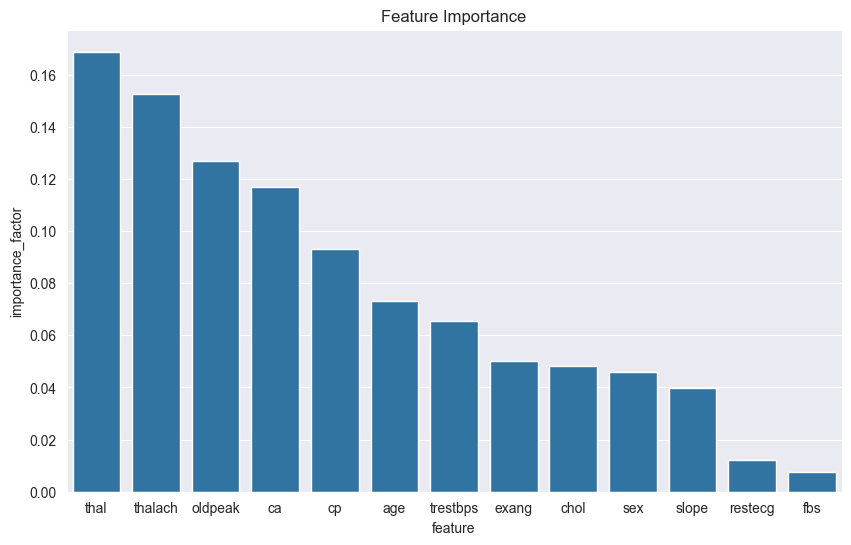

In [184]:
importance_factor=rf_model.feature_importances_
feature_names=x.columns
df_importance=pd.DataFrame({"feature":feature_names,"importance_factor":importance_factor})
print(feature_names.shape)
print(importance_factor.shape)
rf_sorted=df_importance.sort_values(by="importance_factor",ascending=False)
display(rf_sorted)


plt.figure(figsize=(10,6))
sns.barplot(y='importance_factor', x='feature', data=rf_sorted)
plt.title("Feature Importance")
plt.show()


In [187]:
cm=confusion_matrix(y_test,y_test_prediction)

print("TN :",cm[0,0])
print("FP  :",cm[1,1])
print("FN  :",cm[0,1])
print("TP  :",cm[1,1])



print("Classification Report:")
print(classification_report(y_test, y_test_prediction))

TN : 37
FP  : 32
FN  : 11
TP  : 32
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        48
           1       0.74      0.76      0.75        42

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90

